# Lab 4.3: Central Limit Theorem

## Outline

- Central Limit Theorem Basics
- Central Limit Theorem Simulation
- Central Limit Theorem Application

### Central Limit Theorem Basics

**Question 1**  

1) What is the Central Limit Theorem? Explain it in your own words.
   

The Central Limit Theorem states that if you have a sufficient large sample of a given population, then your sample mean follows a normal distribution.

2) What are the assumptions for the Central Limit Theorem?

Finite mean, finite standard deviation and data must be independent and identical distributed.

### Central Limit Theorem Simulation

**Question 2**

Here we will write a function to show that the Central Limit Theorem applies to different distributions. 

1) Write a function `make_draws` which will make a number of draws from one of the following distributions, Possion, Binomial and Uniform. The function will take 3 arguments:
   - The name of the distribution as a string, e.g. `poisson`, `binomial` and `uniform`
   - The parameters associated with the distribution as a dictionary, for example `{'n': 30, 'p': 0.02}` for the binomial distribution 
   - The number of observations to be drawn in a sample  
   
   The function should return an array of values drawn from the specified distribution with the correct sample size.
   
   Below is an example for the binomial distribution
   
   ```python
   # import the stats module from scipy
   from scipy import stats

   def make_draws(distribution, parameters, size):
       if distribution == 'binomial':
           n, p = parameters['n'], parameters['p']
           dist = stats.binom(n, p).rvs(size)

       # Rest of the code
    ```
   

In [1]:
from scipy import stats

def make_draws(distribution, parameters, size):
    if distribution == 'binomial':
        n, p = parameters['n'], parameters['p']
        dist = stats.binom(n, p).rvs(size)
    elif distribution == 'poisson':
        mu = parameters['mu']
        dist = stats.poisson(mu).rvs(size)
    elif distribution == 'uniform':
        a, b = parameters['a'], parameters['b']
        dist = stats.uniform(a, b).rvs(size)
    else:
        dist = "Invalid distribution selection."
    return dist

In [2]:
# Usage example:
make_draws('binomial', {"n":5,"p":0.9}, 100)

array([4, 4, 4, 4, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5,
       4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 5, 4, 4, 5, 3, 5, 5, 5, 4, 4, 4, 2, 4,
       5, 3, 5, 4, 4, 5, 5, 4, 5, 4, 4, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4,
       3, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 4, 5, 4, 4, 4,
       4, 5, 4, 5, 5, 5, 4, 4])

   
2) Write another function `plot_means` that would take the same arguments as `make_draws` plus an additional argument `repeats`
   - `plot_means` would repeatedly draw samples by calling `make_draws`, the number of times `make_draws` is called is speicified by `repeats`
   - The number of observations in each sample is specified by `size`
   - Then the mean of each sample is computed and plotted on a histogram
   
   Below is some starter code:
   
   ```python 
   def plot_means(distribution, parameters, size, repeats):
       # call make_draws for times specified by repeats
       # compute mean for each of the sample
       # plot histogram
   ```
   

In [43]:
%pylab inline 
def plot_means(distribution, parameters, size, repeats):
    means = []
    for i in range(repeats):
        means.append(make_draws(distribution, parameters, size).mean())
    return plt.hist(means, bins=100, normed=True)

Populating the interactive namespace from numpy and matplotlib


In [32]:
def get_graph_limits(distribution, parameters, size):
    data = make_draws(distribution, parameters, size)
    return data.min(), data.max()

3) Call `plot_means` with each of the distribution (poisson, binomial, etc) with the following arguments:
   - `size`: 500 and `repeats`: 500
   - `size`: 10 and `repeats`: 500 
   
   For example, the histogram should look like the following if you call
   ```python
   plot_means('uniform', {'a': 1, 'b': 200}, 500, 500)
   plot_means('uniform', {'a': 1, 'b': 200}, 10, 500)
   ```
   
   ![image](images/unif_histogram.png)
   
   What do you observe? Under what condition does the Central Limit Theorem hold?

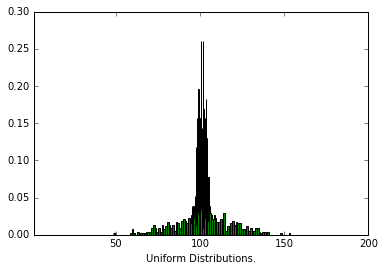

In [47]:
# By calling the function twice, we make both graphics show on the same plot.
plot_means('uniform', {'a': 1, 'b': 200}, 500, 500);
plot_means('uniform', {'a': 1, 'b': 200}, 10, 500);
#xlim(40,160);
# Calling function below to set the x limits. Call only from the one with bigger repeats.
xlim(get_graph_limits('uniform', {'a': 1, 'b': 200}, 500));
plt.xlabel('Uniform Distributions.');

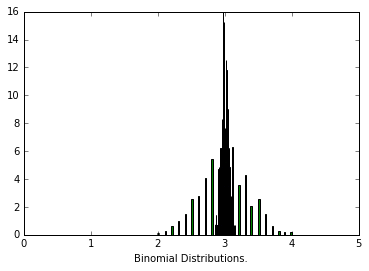

In [48]:
plot_means('binomial', {"n":5,"p":0.6}, 500, 500);
plot_means('binomial', {"n":5,"p":0.6}, 10, 500);
xlim(get_graph_limits('binomial', {"n":5,"p":0.6}, 500));
plt.xlabel('Binomial Distributions.');

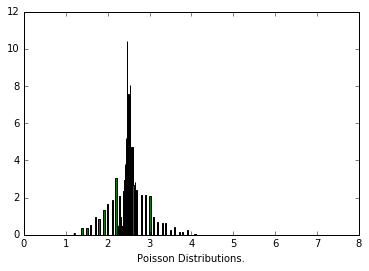

In [52]:
plot_means('poisson', {"mu":2.5}, 500, 500);
plot_means('poisson', {"mu":2.5}, 10, 500);
xlim(get_graph_limits('poisson', {"mu":2.5}, 500));
plt.xlabel('Poisson Distributions.');

We observe that for each distribution, the bigger the size, the less spread the distribution is (it has smaller range) and it concentrates closer to the population mean. The Central Limit Theorem does not hold when the size is 10.

### Central Limit Theorem Application

**Question 3**

1) It is known that the amount that a person spends on a single trip to a grocery store follows a distribution with mean of \$3.70 and standard deviation of \$1.52.

   A random sample of 50 people's spendings is collected. 
   
   What is the probability that the mean spending of the 50 people exceeds $4?


In [29]:
sigma_1 = 1.52
people = 50
sigma_sample_1 = sigma_1/people**(1/2)
1 - stats.norm(3.7,sigma_sample_1).cdf(4)

0.081416664277620843

In [53]:
stats.norm(3.7,sigma_sample_1).sf(4)

0.081416664277620843

2) From past experience, it is known that, at the ticket counter for the football match of Stanford against Berkeley,  the number of tickets purchased by each student follows a distribution that has mean $\mu$ = 2.4 and standard deviation $\sigma$ = 2.0.

   Suppose that a few hours before the start of one of these matches, there are 100 eager students standing in line to purchase tickets. If only 250 tickets remain, what is the probability that all 100 students will be able to purchase the tickets they desire?

In [28]:
tickets = 250
students = 100
ticket_ratio = tickets/students
sigma_2 = 2
sigma_sample_2 = sigma_2/students**(1/2)
stats.norm(2.4,sigma_sample_2).cdf(ticket_ratio)

0.69146246127401323

### Extra Practice  
(Optional)

1) Create your own distribution. It can be any distribution as long as it is a valid probability distribution. Refer to the `custom` distribution we created in the lecture.

In [65]:
def my_draw_function(distribution, parameters, size):
    if distribution == 'exponential':
        l = parameters['l']
        exp_dist = stats.expon(l).rvs(size)
    else:
        print("This is just for exponential enthusiasts.")
    return exp_dist

In [66]:
def plot_function_means(distribution, parameters, size, repeats):
    means = []
    for i in range(repeats):
        means.append(my_draw_function(distribution, parameters, size).mean())
    return plt.hist(means, bins=100, normed=True)

In [70]:
def my_graph_limits(distribution, parameters, size):
    data = my_draw_function(distribution, parameters, size)
    return data.min(), data.max()

2) Draw 10000 samples from the distribution above with the following sample sizes. Calculate and plot the sample means for each sample size. What do you notice from the 3 plots?

    * n = 10
    * n = 100
    * n = 1000

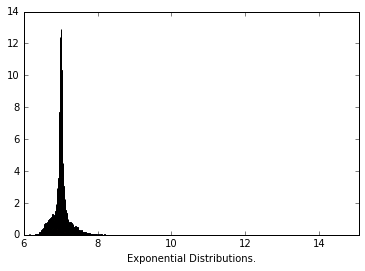

In [71]:
plot_function_means('exponential', {'l': 6}, 10, 10000);
plot_function_means('exponential', {'l': 6}, 100, 10000);
plot_function_means('exponential', {'l': 6}, 1000, 10000);
xlim(my_graph_limits('exponential', {'l': 6}, 1000));
plt.xlabel('Exponential Distributions.');

Once again we observe that the Central Limit Theorem holds when the sample size is sufficient big.

3) Fit a Normal distribution to the 3 sets of samples means from part 2). Then plot the Normal distribution on top of the histogram of the means.  

4) Estimate the Standard Error of the Mean (SEM calculation in the lecture) for each of the 3 sample means. What do you notice? How does the SEM change as the sample size changes?